<a href="https://colab.research.google.com/github/Tal144155/DTS_Project/blob/main/TDS_Project_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tabular Data Science - Part #1
### Group Members: 
* Tal Ariel Ziv
* Arnon Lutsky

#### Introduction
In this project, we aim to explore the fascinating intersection of movies and data science by building a predictive model for box office revenue. Using a dataset containing various attributes of movies, such as genre, cast, budget, runtime, release date, and more, we will analyze patterns and trends to determine what factors contribute to a film's financial success.


### Dataset Selection:

#### **Overview of the Movies Dataset**
We chose The Movies Dataset because it is both fascinating and rich in features, making it ideal for exploring the dynamics of the movie industry. Predicting movie revenue based on details like budget, genres, cast, and crew is an engaging real-world challenge that combines creativity with analytical problem-solving.

<font size=4px> **About the Dataset:**</font>
* The Dataset contains MetaData of about 45,000 movies.
* The data also contains a table with the crew and cast members (names, gender, etc).
* There are extra 5 tables, including: links, rating (reviews from viewers), and keywords.

**Movies MetaData set:**
* Number of Records: 45,467.
* number of Features: 24 (not all relevant, will be explain later).
* Features names and types:<br>
    (i) <u>Numeric:</u> Adults (yes/no), Belongs_To_Collenction (yes/no), Budget, Original_Language (en/other), Popularity, Revenue, Runtime, Release_Date, Vote_Avarage, Vote_Count.<br>
    (ii) <u>Categorical:</u> Genres, Production_Companys, Production_Countries, Spoken_Languages.<br>
    (iii) <u>Other:</u> Title, Overview.<br>

**Credits set:**
* Number of Records: 45,505.
* number of Features: 3.
* Features names and types:<br>
    (i) Crew Members: Contains information about the crew members, their job, names, gender, etc.<br>
    (ii) Cast Members: Contians information about the cast, actross, their role in the movie and more.<br>
    <br>
Both of those Features can be numeric (for example, counting the number of crew and cast members), but they can also be used to gather more inforamtion about the movie (if a famous actress plays in the movie).



##### **Reference**
> **Dataset**: Press on this [link](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset) to view the data set in Kaggle.


Now, lets start analyzing the data, and solve some problems that will arise.

### 0. Imports

In [90]:
#data processing
import pandas as pd
import numpy as np

#data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Machine learning library
# import sklearn

import ast

import warnings
warnings.filterwarnings("ignore")

### 1. Data Overview
Now, lets upload the data end start exploring it.

In [91]:
data_movies = pd.read_csv("Data/movies_metadata.csv",index_col='id')
data_credits = pd.read_csv("Data/credits.csv",index_col='id')

A look at the information in the movie metafata dataset:

In [92]:
cols = ["adult", "belongs_to_collection", "genres","original_language", "original_title", "budget",
        "overview", "popularity", "production_companies", "production_countries", "release_date", "runtime",
        "spoken_languages", "tagline", "vote_average", "vote_count", "revenue"]
data_movies = data_movies[cols]
data_movies.head()

,adult,belongs_to_collection,genres,original_language,original_title,budget,overview,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,tagline,vote_average,vote_count,revenue
id,,,,,,,,,,,,,,,,,
862,False,"{'id': 10194, 'name': 'Toy Story Collection', ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,Toy Story,30000000,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,7.7,5415.0,373554033.0
8844,False,NaN,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,Jumanji,65000000,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Roll the dice and unleash the excitement!,6.9,2413.0,262797249.0
15602,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,Grumpier Old Men,0,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Still Yelling. Still Fighting. Still Ready for...,6.5,92.0,0.0
31357,False,NaN,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,Waiting to Exhale,16000000,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Friends are the people who let you be yourself...,6.1,34.0,81452156.0
11862,False,"{'id': 96871, 'name': 'Father of the Bride Col...","[{'id': 35, 'name': 'Comedy'}]",en,Father of the Bride Part II,0,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Just When His World Is Back To Normal... He's ...,5.7,173.0,76578911.0


As you might see, the data is a bit messy, lots of texts and arrays (containing json). also, there are parts with Null values, but also boxes with the value zero (for example, some of the movies don't have budget or box office revenue). We will fix that later.

Now lets look at the Credits table.

In [93]:
cols = ["crew", "cast"]
data_credits = data_credits[cols]
data_credits.head()

,crew,cast
id,,
862,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'cast_id': 14, 'character': 'Woody (voice)',..."
8844,"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'cast_id': 1, 'character': 'Alan Parrish', '..."
15602,"[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'cast_id': 2, 'character': 'Max Goldman', 'c..."
31357,"[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'cast_id': 1, 'character': ""Savannah 'Vannah..."
11862,"[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'cast_id': 1, 'character': 'George Banks', '..."


This table consist of the crew members and the cast members. It contains an array of JSONs with the information of each crew/cast member.

At this point, we won't use the gender, name and other attributes in each JSON, but just the count of how many cast/crew members each movie has.

<font size=4px>Now, lets look at how many null values exists in each column. First we will check the metadata of the movies.</font>

In [94]:
data_movies.isnull().sum()

adult                        0
belongs_to_collection    40972
genres                       0
original_language           11
original_title               0
budget                       0
overview                   954
popularity                   5
production_companies         3
production_countries         3
release_date                87
runtime                    263
spoken_languages             6
tagline                  25054
vote_average                 6
vote_count                   6
revenue                      6
dtype: int64

As you can see, Most of the movies dose not belong to any collection. That makes sense, because most movies are standalone. Some comes from a series of movies, like Toy Story, but most of them does not.

It wont be a problem because this column will be numeric, 1 - belongs to any collection, 0 - does not belong.

Now, let's look at the budget column. Even though it seems there are no movies with null budget value, a lot of movies have budget value of 0 - and in our case, it is very problematic. In the first phase, we will ignore those lines, meaning we will look only for the movies with budget higher than 0.

This also happens in the revenue column, and we'll ignore them too. 

**Meaning, that at this point of the project we will only use movies that their budget & revenue is bigger than zero.**

Other columns, like original language, run time, vote avarage and vote count will be filled (for now) with avarage of each feature.

<font size=4px>Now, lets look at the credits Dataset.</font>

In [95]:
data_credits.isnull().sum()

crew    0
cast    0
dtype: int64

You might think that all movies have inforamtion about their cast and crew, however this is incorrect.
The crew and cast are represented as an array, so if the cast is empty, there is an empty array, [], so it is not recognized by Null. At this point, we will calculate avarage and insert it instead.

### 2. Data Cleaning

Let's start cleaning our data. We'll begin with the Metadata set.

1. First, we need to change the columnes to contain non-numeric values.

In [96]:
data_movies['budget'] = pd.to_numeric(data_movies['budget'], errors='coerce')
data_movies['revenue'] = pd.to_numeric(data_movies['revenue'], errors='coerce')

2. Second, we will remove all the lines without **Budget** or without **Revenue**.<br> This columns are most important, because budget usually has high correlation with the revenue, so as we said we will (for now) examine mocies with positive budget and revenue.

In [97]:
data_movies_filtered = data_movies[(data_movies['budget'] > 0) & (data_movies['revenue'] > 0)].dropna(subset=['budget', 'revenue'])

3. We'll modify the adult column to be a numerrical 0/1 instead of Boolean. 

In [98]:
data_movies_filtered['adult'] = data_movies_filtered['adult'].map({'True': 1, 'False': 0})

# Checking how many lines we have from each type
counts = data_movies_filtered["adult"].value_counts()

print("Number of 0s:", counts.get(0, 0))
print("Number of 1s:", counts.get(1, 0))

Number of 0s: 5381
Number of 1s: 0


Unfortunately, we see that non of the lines (after the clean) has value of True. so at this point, we wont use this feature, and we will use it in the next part, after we deal with the budget and revenue problem. So, let's remove those columns from our data.

In [99]:
new_cols = ["original_title", "belongs_to_collection", "genres","original_language", "budget",
        "popularity", "production_companies", "production_countries", "release_date", "runtime",
        "spoken_languages", "vote_average", "vote_count", "revenue"]
data_movies_filtered = data_movies_filtered[new_cols]

4. Transferring belong_to_collection into Boolean: 1 - belongs to some collection, 0 - does not.

In [100]:
data_movies_filtered['belongs_to_collection'] = data_movies_filtered['belongs_to_collection'].notnull().astype(int)
counts = data_movies_filtered["belongs_to_collection"].value_counts()

print("Number of 0s:", counts.get(0, 0))
print("Number of 1s:", counts.get(1, 0))

Number of 0s: 4157
Number of 1s: 1224


Not as before, here we have better information about movies coming from other collections, so we can work with this data.

5. Transforming the language of the movie: 1 - if the original language is english, 0 - otherwise.

In [101]:
data_movies_filtered['original_language'] = data_movies_filtered['original_language'].apply(lambda x: 1 if x == 'en' else 0)

6. Now, we'll take care of the Genre column. We want to turn it into a **Multi-Hot Vector**, containing each movies genres. Lets implement it. The vector will be implemented as different column for each genre.

In [102]:
data_movies_filtered['genres'] = data_movies_filtered['genres'].apply(
    lambda x: ast.literal_eval(x) if pd.notnull(x) and isinstance(x, str) else []
)

unique_genres = set()
for genres in data_movies_filtered['genres']:
    unique_genres.update(genre['name'] for genre in genres)

for genre in unique_genres:
    data_movies_filtered[genre] = data_movies_filtered['genres'].apply(
        lambda x: 1 if any(d['name'] == genre for d in x) else 0
    )

data_movies_filtered = data_movies_filtered.drop(columns=['genres'])

Now, let's look at the table and it's layout now.

In [103]:
data_movies_filtered.head()

,original_title,belongs_to_collection,original_language,budget,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,...,Crime,War,Animation,Romance,Western,Action,Mystery,Music,Drama,Adventure
id,,,,,,,,,,,,,,,,,,,,,
862,Toy Story,1,1,30000000.0,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,1,0,0,0,0,0,0,0
8844,Jumanji,0,1,65000000.0,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",...,0,0,0,0,0,0,0,0,0,1
31357,Waiting to Exhale,0,1,16000000.0,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,0,1,0,0,0,0,1,0
949,Heat,0,1,60000000.0,17.924927,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",...,1,0,0,0,0,1,0,0,1,0
9091,Sudden Death,0,1,35000000.0,5.23158,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,0,0,0,1,0,0,0,1


As you might see, we added a column to each genre, containing: 1 - if the movie is in the genre, 0 - if not.<br><br>
7. The full date will become only the Year.<br>
8. The spoken languages will become the number of Spoken Languages in the movie. The minimum will be 1 (if the box is empty, we will fill in with one).

In [104]:
# Taking care of the Year.

data_movies_filtered['release_date'] = pd.to_datetime(data_movies_filtered['release_date'], errors='coerce')
data_movies_filtered['release_year'] = data_movies_filtered['release_date'].dt.year
data_movies_filtered = data_movies_filtered.drop(columns=['release_date'])

#Taking care of the languages.

data_movies_filtered['spoken_languages'] = data_movies_filtered['spoken_languages'].apply(
    lambda x: len(ast.literal_eval(x)) if pd.notnull(x) and isinstance(x, str) else 0
)

9. Taking care of the Countries, we will count the number of production countries, and replace the column with it.<br>
10. Lastly, we need to change the Production Companies column. We wanted to do the same thing as we did in the genre, however, there are too many production companies. for now, we will remain with the count of production companies.

In [105]:
# Taking care of Production Countries.

data_movies_filtered['production_countries'] = data_movies_filtered['production_countries'].apply(
    lambda x: len(ast.literal_eval(x)) if pd.notnull(x) and isinstance(x, str) else 0
)

# Taking care of Production Companies.

data_movies_filtered['production_companies_count'] = data_movies_filtered['production_companies'].apply(
    lambda x: len(ast.literal_eval(x)) if pd.notnull(x) and isinstance(x, str) else 0
)

data_movies_filtered = data_movies_filtered.drop(columns=['production_companies'])

For now, we have finished editing the movies Metadata set. Lets look at the results, see if there are any rows left with null values.

In [106]:
data_movies_filtered.isna().sum()

original_title                0
belongs_to_collection         0
original_language             0
budget                        0
popularity                    0
production_countries          0
runtime                       1
spoken_languages              0
vote_average                  0
vote_count                    0
revenue                       0
Comedy                        0
History                       0
Documentary                   0
Family                        0
Foreign                       0
Science Fiction               0
Fantasy                       0
TV Movie                      0
Horror                        0
Thriller                      0
Crime                         0
War                           0
Animation                     0
Romance                       0
Western                       0
Action                        0
Mystery                       0
Music                         0
Drama                         0
Adventure                     0
release_

As you can see, there is one line with value of null in runtime, however by taking a quick look we'll see that some movies have a value of zero. we will replace them with the average runtime.

In [107]:
average_runtime = data_movies_filtered['runtime'][
    (data_movies_filtered['runtime'] != 0) & (data_movies_filtered['runtime'].notnull())
].mean()

data_movies_filtered['runtime'] = data_movies_filtered['runtime'].apply(
    lambda x: average_runtime if x == 0 or pd.isnull(x) else x
)

# Looking at the new data
data_movies_filtered.head()

,original_title,belongs_to_collection,original_language,budget,popularity,production_countries,runtime,spoken_languages,vote_average,vote_count,...,Animation,Romance,Western,Action,Mystery,Music,Drama,Adventure,release_year,production_companies_count
id,,,,,,,,,,,,,,,,,,,,,
862,Toy Story,1,1,30000000.0,21.946943,1,81.0,1,7.7,5415.0,...,1,0,0,0,0,0,0,0,1995,1
8844,Jumanji,0,1,65000000.0,17.015539,1,104.0,2,6.9,2413.0,...,0,0,0,0,0,0,0,1,1995,3
31357,Waiting to Exhale,0,1,16000000.0,3.859495,1,127.0,1,6.1,34.0,...,0,1,0,0,0,0,1,0,1995,1
949,Heat,0,1,60000000.0,17.924927,1,170.0,2,7.7,1886.0,...,0,0,0,1,0,0,1,0,1995,3
9091,Sudden Death,0,1,35000000.0,5.23158,1,106.0,1,5.5,174.0,...,0,0,0,1,0,0,0,1,1995,3


<font size=4px>Now, we have officially done editing this dataset, and we will move on to the Credits dataset.</font><br>

1. We'll replace each array in the cast column with the number of cast members.
2. The same for the numebr of actors.<br>
Because these lists consist of JSON objects with the info of the crewmember/ actor we can replace the array with it's length. this will give us the count of the people in the array.

In [108]:
data_credits_filtered = data_credits[:]
data_credits_filtered['crew'] = data_credits['crew'].apply(
    lambda x: len(ast.literal_eval(x)) if pd.notnull(x) and isinstance(x, str) else 0
)

data_credits_filtered['cast'] = data_credits_filtered['cast'].apply(
    lambda x: len(ast.literal_eval(x)) if pd.notnull(x) and isinstance(x, str) else 0
)
data_credits_filtered.head()

,crew,cast
id,,
862,106,13
8844,16,26
15602,4,7
31357,10,10
11862,7,12


<font size=4px>Now, we have officially done editing this datasets, and will now merge them.</font>

In [109]:
# Converting to the same indexing type for the library to match the ids.
data_movies_filtered.index = data_movies_filtered.index.astype(int)
data_credits_filtered.index = data_credits_filtered.index.astype(int)

dataset = pd.merge(data_movies_filtered, data_credits_filtered, left_index=True, right_index=True, how='inner')
dataset.head()

,original_title,belongs_to_collection,original_language,budget,popularity,production_countries,runtime,spoken_languages,vote_average,vote_count,...,Western,Action,Mystery,Music,Drama,Adventure,release_year,production_companies_count,crew,cast
id,,,,,,,,,,,,,,,,,,,,,
862,Toy Story,1,1,30000000.0,21.946943,1,81.0,1,7.7,5415.0,...,0,0,0,0,0,0,1995,1,106,13
8844,Jumanji,0,1,65000000.0,17.015539,1,104.0,2,6.9,2413.0,...,0,0,0,0,0,1,1995,3,16,26
31357,Waiting to Exhale,0,1,16000000.0,3.859495,1,127.0,1,6.1,34.0,...,0,0,0,0,1,0,1995,1,10,10
949,Heat,0,1,60000000.0,17.924927,1,170.0,2,7.7,1886.0,...,0,1,0,0,1,0,1995,3,71,65
9091,Sudden Death,0,1,35000000.0,5.23158,1,106.0,1,5.5,174.0,...,0,1,0,0,0,1,1995,3,9,6


After merging both Datasets, we are officially ready to start visualizing and build the model properly.<br>
### 3. Visualizations

**a. Data Distribution:** We will now visualize some interesting features in our data.<br><br>
First, let's examine how the data is distributed. Plotting the distribution of `revenue` is essential to understand the spread and nature of the data, as it often shows a skewed pattern with a few blockbusters earning disproportionately high amounts.<br> Visualizing this helps identify outliers, assess whether transformations (like log-scaling) are needed, and ensures the regression model can effectively predict across varying revenue ranges.

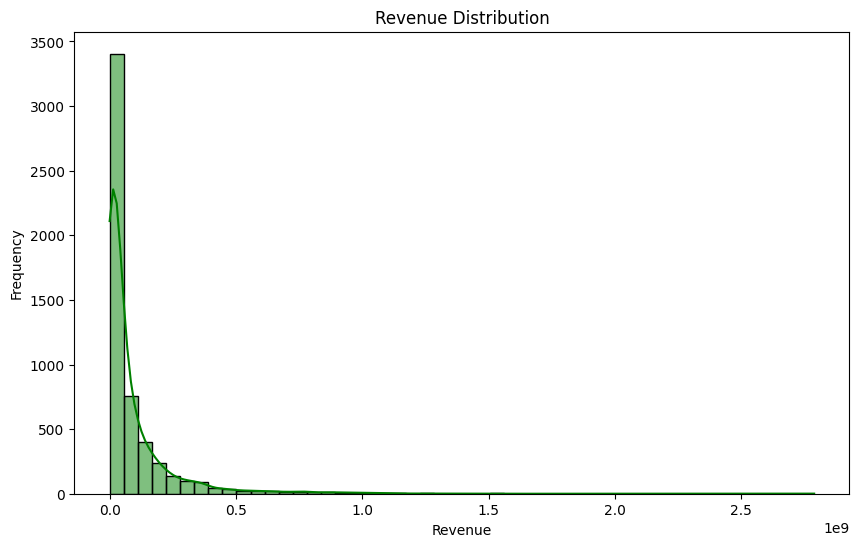

In [110]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['revenue'], bins=50, kde=True, color='green') 
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

**Explanation**<br>
Most movies generate relatively low `revenue`, as shown by the tall bars on the left side of the histogram, while only a small number achieve exceptionally high earnings. This creates a long tail on the right, representing blockbuster films with extraordinary `revenue`. This uneven distribution highlights the challenge of modeling movie `revenue`, as predicting the rare, high-revenue outcomes may require special attention. The distribution looks a lot like geometric distribution, and it might help applying techniques like log-scaling to normalize the data.

Now, let's move to another interesting visualization of our data.<br><br>
**b. Correlation Between Features**<br>


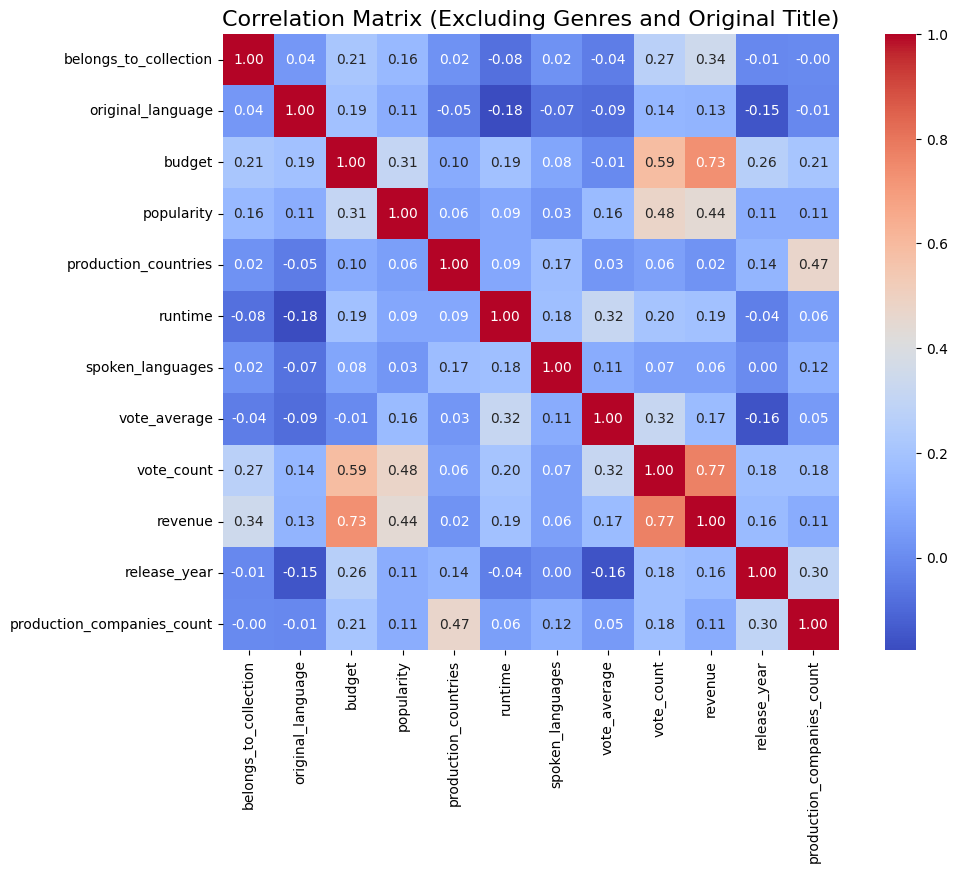

In [111]:
columns_to_drop = list(unique_genres) + ['original_title']
data_without_genres_and_title = data_movies_filtered.drop(columns=columns_to_drop, axis=1)

correlation_matrix = data_without_genres_and_title.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

plt.title("Correlation Matrix (Excluding Genres and Original Title)", fontsize=16)
plt.show()


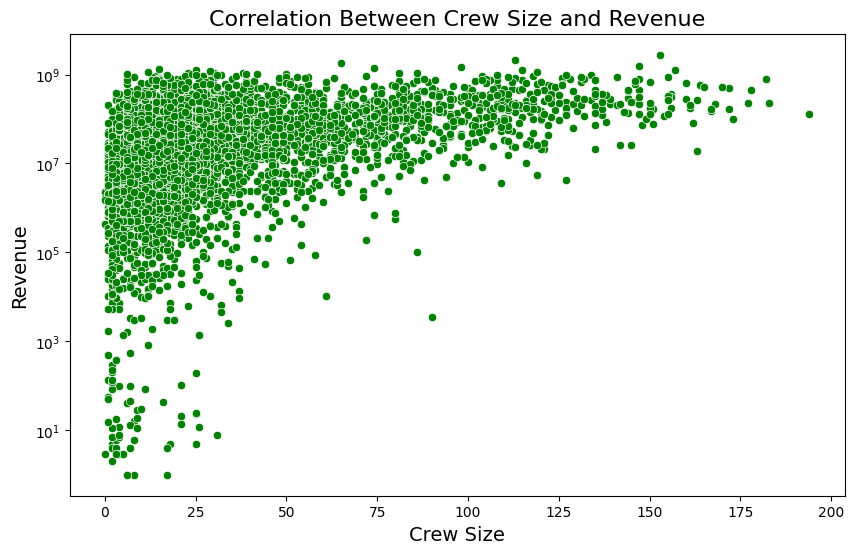

In [112]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='crew', y='revenue', color='green')
plt.yscale('log')
plt.title('Correlation Between Crew Size and Revenue', fontsize=16)
plt.xlabel('Crew Size', fontsize=14)
plt.ylabel('Revenue', fontsize=14)

plt.show()

**Explanation**<br>
We can see thats as crew sizes grow, there are less and less movies with small revenue.